# Advanced Portfolio Optimization: The Black-Litterman Model

 ## Motivation

__Recap: Problems of Mean-Variance-Optimization (MVO)__

- can lead to __short__ positions and positions __> 1__ (unbounded)
- will certainly lead to __concentrated__ portfolios (unbounded)
- highly dependent on & sensitive to __inputs/assumptions__ (return forecasts) -> GIGO
- small changes in forecasts (returns) lead to __large changes in weights__ (rebalancing costs!)
- __no guarantee__ that MVO-optimized Portfolio performs better than naive-diversified portfolio

__-> Biggest Issue: Forecasting Returns__

There do exist various return forecasting models (in particular for stocks). But, these models...
- lead to conflicting results...
- require assumptions/inputs (GIGO)...
- don´t guarantee accurate forecasts
- can´t be applied to all asset classes (e.g. Cryptocurrencies)

__Alternative Approach__: Why not starting with (average) __Market Expectations__ (implied returns)?

(Average) Market Expectations can´t be observed directly. But...

Recap: __Two-Fund-Theorem__ and the __(Global) Market Portfolio__

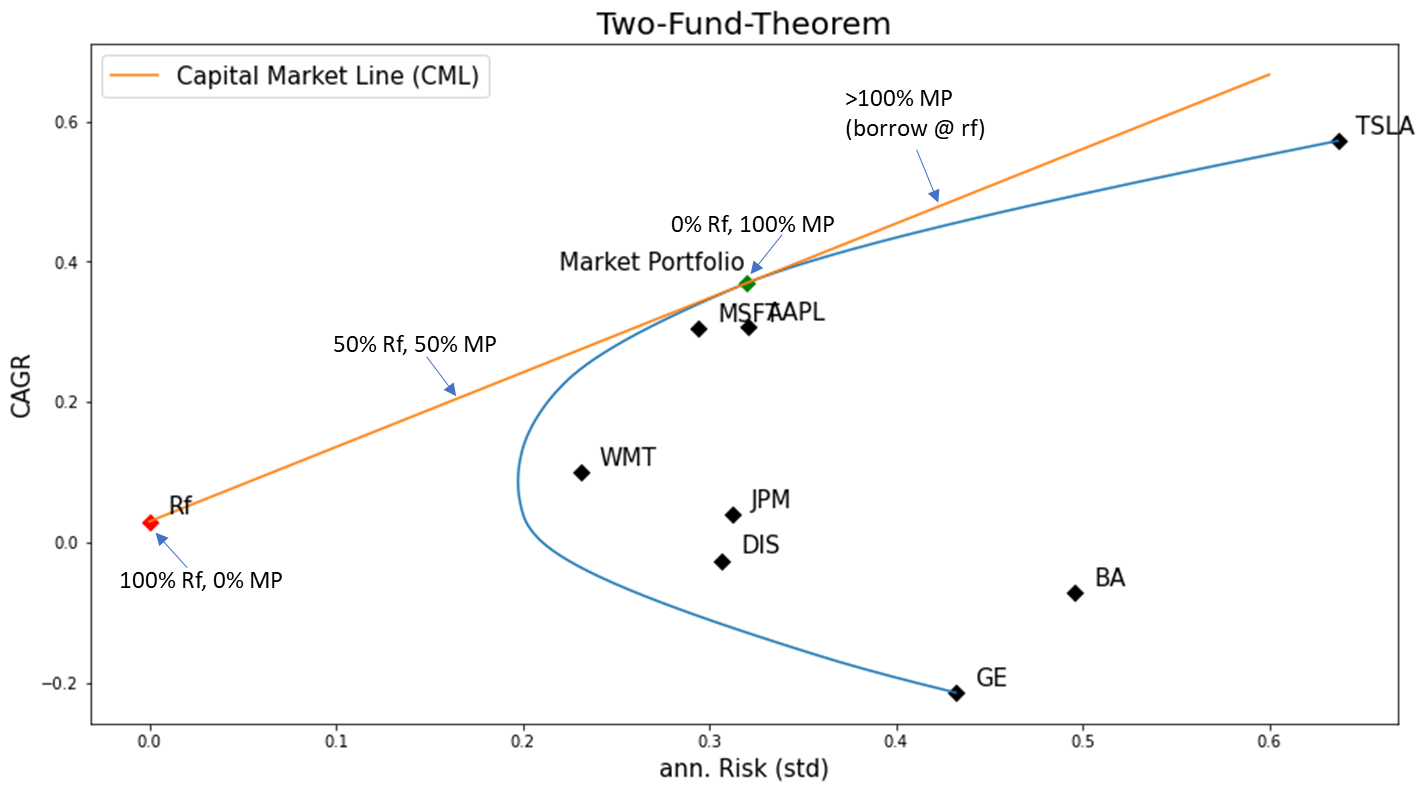

- Every Investor should hold a __combination of Rf and MSRP__ .
- MSRP also called (global) __Market Portfolio__ (MP). 
- The (global) Market Portfolio can be observed in the market. -> Market Cap Weighted Portfolio

-> Assumption: __The observable Market Portfolio__ is the __optimal__ forward-looking Portfolio (Market Cap weights are optimal weights)

__Recap: MVO Optimization__

Inputs:

- __expected Returns (risky assets)__
- Return Risk-free Asset
- expected Variances / Covariances

Output:

- __efficient/optimal Weights__

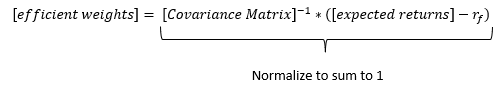

__Reverse Optimization:__

Inputs:

- Return risk-free Asset
- expected Variances / Covariances
- __market cap weights (efficient)__

Output:

- __Implied Returns__ (market expectation)

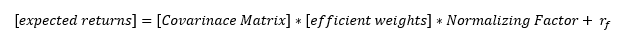

## Getting started (Inputs for reverse Optimization)

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.6f}'.format

__Return of Risk-free Assets:__

In [ ]:
rf = 0.03

__Market Cap Weights__, as of 2022-06-30: 

In [ ]:
weights= {'AAPL': 0.3758452265955565,
          'BA': 0.01379913198459885,
          'DIS': 0.029242799417694997,
          'GE': 0.011873988109005319,
          'JPM': 0.05616250119046,
          'MSFT': 0.32652616971197673,
          'TSLA': 0.1298723826886709,
          'WMT': 0.0566778003020367}
weights

In [ ]:
weights = pd.Series(weights)
weights

In [ ]:
df = pd.read_csv("stocks.csv", parse_dates = ["Date"], index_col = "Date")
df

In [ ]:
returns = df.pct_change()
returns

__Covariance Matrix:__

In [ ]:
cov_matrix = returns.cov() * 252
cov_matrix

## Black-Litterman Step 1: Reverse Optimization

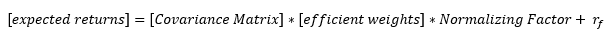

__Normalizing Factor:__

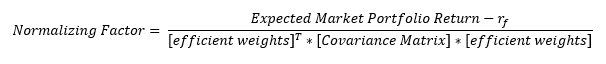

__Expected Return of Market Portfolio__ (rough guess)

In [ ]:
rm = 0.1
rm

In [ ]:
nf = (rm - rf) / (weights.T.dot(cov_matrix).dot(weights))
nf

In [ ]:
impl_ret = cov_matrix.dot(weights) * nf + rf
impl_ret

-> Implied/expected returns. -> Market Cap weighted Porfolio == Optimal Portfolio 

__Cross Check (MVO Optimization)__

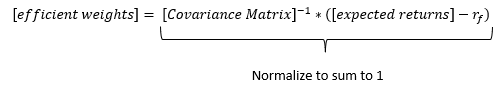

In [ ]:
weights

In [ ]:
cov_matrix_inv = pd.DataFrame(np.linalg.pinv(cov_matrix.values), cov_matrix.columns, cov_matrix.index)
cov_matrix_inv

In [ ]:
w = cov_matrix_inv.dot(impl_ret - rf)
w

In [ ]:
optimal_weights = (w/w.sum())
optimal_weights

In [ ]:
weights

## Black-Litterman Step 2: Incorporating Investor Opinions 

In [ ]:
impl_ret

__Two options:__

1. Do you __agree__ with implied returns / market expectations? <br>
-> Invest in the __Market Portfolio__ (Market Cap weighted)

2. Do __you know it better__ than the market?
-> Add __your (subjective) opinions__ by adjusting implied returns 

__Be careful: Overconfidence Bias__

-> Beating the Market or having superior skills/information is __way more difficult__ than most investors think.

"Around __88%__ of American drivers considered themselves to be __above average__ at driving" (according to a Swedish study published in 1981)

In [ ]:
impl_ret

In [ ]:
opinion = pd.Series(data = [-0.01, -0.01, +0.01, 0, 0, -0.01, -0.01, +0.01], index = impl_ret.index)
opinion

In [ ]:
forecast = impl_ret + opinion
forecast

In [ ]:
w = cov_matrix_inv.dot(forecast - rf)
w

In [ ]:
optimal_weights = (w/w.sum()) 
optimal_weights

In [ ]:
weights

__Final Remarks:__

- Black-Litterman (BL) more meaningful/reliable if the entire market is included 
- small forecast changes lead to large changes in weights (be careful)
- BL should be combined with additional bounds/constraints
- opinions should be derived from / verified with other forecasting models